In [44]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_aisles = pd.read_csv("Data/aisles.csv")
df_departments = pd.read_csv("Data/departments.csv")
df_oder_products = pd.read_csv("Data/oder_products_s.csv")
df_oders = pd.read_csv("Data/oders_s.csv")
df_products = pd.read_csv("Data/products.csv")
df_tips = pd.read_csv("Data/tips.csv")

In [ ]:
%run "Load_and_Preprocessing.ipynb"

aisle_id     int64
aisle       object
dtype: object
department_id     int64
department       object
dtype: object
order_id             int64
product_id           int64
add_to_cart_order    int64
dtype: object
order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object
Unnamed: 0    int64
order_id      int64
tip            bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data col

In [27]:
df_order_products = df_order_products
df_orders = df_orders

In [30]:
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2539329,1,1,2,8,NaN,False
1,2398795,1,2,3,7,15.0,False
2,473747,1,3,3,12,21.0,False
3,2254736,1,4,4,7,29.0,False
4,431534,1,5,4,15,28.0,False
...,...,...,...,...,...,...,...
1673016,2266710,206209,10,5,18,29.0,False
1673017,1854736,206209,11,4,10,30.0,False
1673018,626363,206209,12,1,12,18.0,False
1673019,2977660,206209,13,1,12,7.0,False


In [19]:
df_oders 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
1673016,2266710,206209,10,5,18,29.0
1673017,1854736,206209,11,4,10,30.0
1673018,626363,206209,12,1,12,18.0
1673019,2977660,206209,13,1,12,7.0


## Aufgabe 1

## 1.1 Gibt es einen Zusammenhang bezüglich der vorgehenden Bestellung?

In [39]:
# Daten nach Nutzer und Bestellzeitpunkt sortieren
df_orders = df_orders.sort_values(by=['user_id', 'order_number'])

#Vorhergehendes Trinkgeld (lagged variable) erstellen
df_orders['previous_tip'] = df_orders.groupby('user_id')['tip'].shift(1)

#Fehlende Werte auffüllen (z.B. erste Bestellung eines Nutzers)
df_orders['previous_tip'] = df_orders['previous_tip'].fillna(False).astype(int)

print(df_orders[['user_id', 'order_number', 'tip', 'previous_tip']].head(20)) #zur Kontrolle

In [42]:
from scipy.stats import chi2_contingency

# Kreuztabelle erstellen
crosstab = pd.crosstab(df_orders['tip'], df_orders['previous_tip'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-Quadrat-Wert:", chi2) # großer Chi-Quadrat-Wert Zeigt eine große Abweichung zwischen den beobachteten und erwarteten Werten.
                                 # Dies deutet auf einen möglichen Zusammenhang zwischen den Variablen hin.
print("p-Wert:", p)              # da der p-Wert kleiner als 0.05 ist , gibt es einen signifikanten Zusammenhang zwischen dem Trinkgeld und dem Trinkgeld der vorherigen Bestellung.

Chi-Quadrat-Wert: 374977.863662484
p-Wert: 0.0


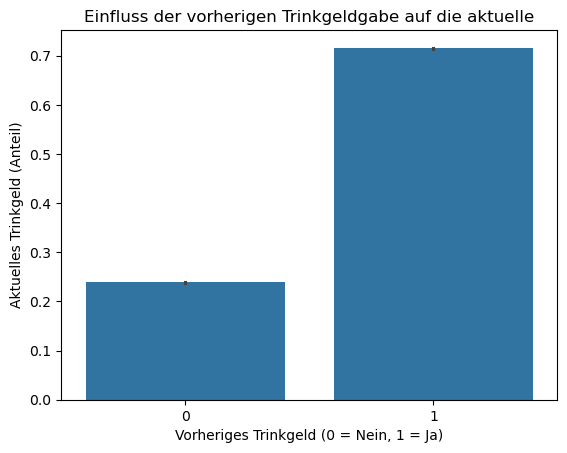

In [45]:
sns.barplot(data=df_orders, x='previous_tip', y='tip')
plt.title("Einfluss der vorherigen Trinkgeldgabe auf die aktuelle")
plt.xlabel("Vorheriges Trinkgeld (0 = Nein, 1 = Ja)")
plt.ylabel("Aktuelles Trinkgeld (Anteil)")
plt.show()

## 1.2 Gibt es einen Zusammenhang bezüglich der vor-vorhergehenden Bestellung?

In [55]:
# Vor-vorhergehendes Trinkgeld (lag-2 variable) erstellen
df_orders['tip_lag_2'] = df_orders.groupby('user_id')['tip'].shift(2)

# Fehlende Werte auffüllen (erste und zweite Bestellung eines Nutzers)
df_orders['tip_lag_2'] = df_orders['tip_lag_2'].fillna(False).astype(int)

# Daten überprüfen
print(df_orders[['user_id', 'order_number', 'tip', 'tip_lag_2']].head(10))

# Kreuztabelle erstellen
crosstab = pd.crosstab(df_orders['tip'], df_orders['tip_lag_2'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-Quadrat-Wert:", chi2) # Großer Wert deutet drauf, dass es einen Zusammenhang gibt
print("p-Wert:", p) # da wert kleiner als 0.05 kann man erkennen, dass es einen Zusammenhang gibt

   user_id  order_number    tip  tip_lag_2
0        1             1  False          0
1        1             2  False          0
2        1             3  False          0
3        1             4  False          0
4        1             5  False          0
5        1             6  False          0
6        1             7  False          0
7        1             8  False          0
8        1             9  False          0
9        1            10  False          0
Chi-Quadrat-Wert: 262956.2257393057
p-Wert: 0.0


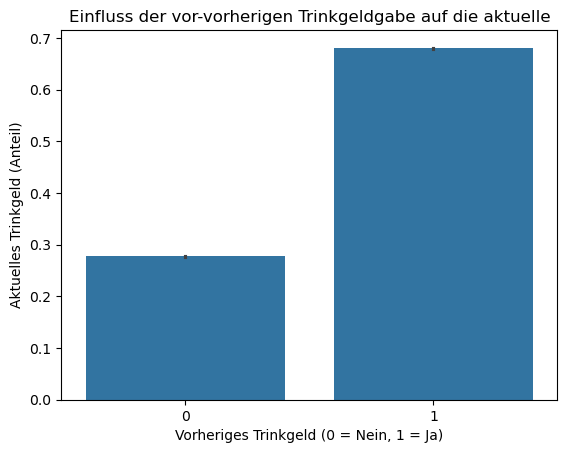

In [58]:
sns.barplot(data=df_orders, x='tip_lag_2', y='tip')
plt.title("Einfluss der vor-vorherigen Trinkgeldgabe auf die aktuelle")
plt.xlabel("Vorheriges Trinkgeld (0 = Nein, 1 = Ja)")
plt.ylabel("Aktuelles Trinkgeld (Anteil)")
plt.show()  #Anhand der Visualisierung kann man erkennen, dass es einen Zusammenhang gibt,
            #der jedoch kleiner ist als der Zusammenhang zwischen der nur 1 vorherigen bestellung.